Nama : Hendra Irawan,
Username : h9dra_irawan,
Email : h9dragstyle@gmail.com,
Kota Domisili : Kota Surabaya,
Tempat Lahir : Kota Tulungagung,
Tanggal Lahir : 09-05-2002,
Jenis Kelamin : Laki-laki,
Pendidikan Terakhir : SMA,
Pekerjaan/profesi Saat Ini : Pelajar/Mahasiswa,
Perusahaan/institusi Saat Ini : Institut Sains Terapan dan Teknologi Surabaya

In [11]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df = pd.read_csv('/content/drive/MyDrive/DICODING/youtube.csv')
category = pd.get_dummies(df.category)
df = df.drop(columns=['link','description','category'])
dataset = pd.concat([df,category],axis=1)
dataset

,title,art_music,food,history,travel
0,Ep 1| Travelling through North East India | Of...,0,0,0,1
1,Welcome to Bali | Travel Vlog | Priscilla Lee,0,0,0,1
2,My Solo Trip to ALASKA | Cruising From Vancouv...,0,0,0,1
3,Traveling to the Happiest Country in the World!!,0,0,0,1
4,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,0,0,0,1
...,...,...,...,...,...
3594,21st Century Challenges: Crash Course European...,0,0,1,0
3595,EU DataViz webinar - Barnaby Skinner - How to ...,0,0,1,0
3596,Stone Age Scandinavia: First People In the Nor...,0,0,1,0
3597,AP European History - Interwar Period: Paris P...,0,0,1,0


In [13]:
title = dataset['title'].str.lower()
labels = dataset[['art_music','food','history','travel']].values

In [14]:
stop_word = set(stopwords.words('english'))
tokenizer = nltk.RegexpTokenizer(r"\w+")
title = title.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_word]))
title = title.apply(lambda x: tokenizer.tokenize(x))
title_train, title_test, labels_train, labels_test = train_test_split(title, labels, test_size=0.2,train_size=0.8)

In [15]:
tokenizer = Tokenizer(num_words=1000, oov_token='<oov>')
tokenizer.fit_on_texts(title_train)

sekuens_train = tokenizer.texts_to_sequences(title_train)
sekuens_test = tokenizer.texts_to_sequences(title_test)

padded_train = pad_sequences(sekuens_train,
                             padding='post',
                             maxlen=15)
padded_test = pad_sequences(sekuens_test,
                            padding='post',
                             maxlen=15)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000,1000,input_length=15),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.95 and logs.get('val_accuracy') > 0.95 and epoch > 10):
      print("\nAkurasi dan val_accuracy mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [18]:
history = model.fit(padded_train,
                    labels_train,
                    epochs=30,
                    validation_data=(padded_test, labels_test),
                    callbacks=[callbacks],
                    verbose=1)

Epoch 1/30
90/90 [==============================] - 7s 59ms/step - loss: 0.6557 - accuracy: 0.7367 - val_loss: 0.1989 - val_accuracy: 0.9431
Epoch 2/30
90/90 [==============================] - 5s 53ms/step - loss: 0.1496 - accuracy: 0.9597 - val_loss: 0.1358 - val_accuracy: 0.9611
Epoch 3/30
90/90 [==============================] - 5s 57ms/step - loss: 0.0758 - accuracy: 0.9746 - val_loss: 0.1175 - val_accuracy: 0.9611
Epoch 4/30
90/90 [==============================] - 5s 56ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.1251 - val_accuracy: 0.9625
Epoch 5/30
90/90 [==============================] - 3s 38ms/step - loss: 0.0318 - accuracy: 0.9878 - val_loss: 0.1282 - val_accuracy: 0.9639
Epoch 6/30
90/90 [==============================] - 4s 41ms/step - loss: 0.0171 - accuracy: 0.9951 - val_loss: 0.1866 - val_accuracy: 0.9569
Epoch 7/30
90/90 [==============================] - 3s 32ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.1854 - val_accuracy: 0.9597
Epoch 8/30
90

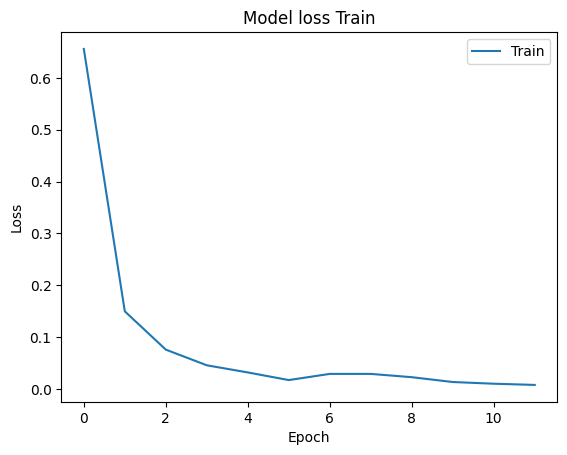

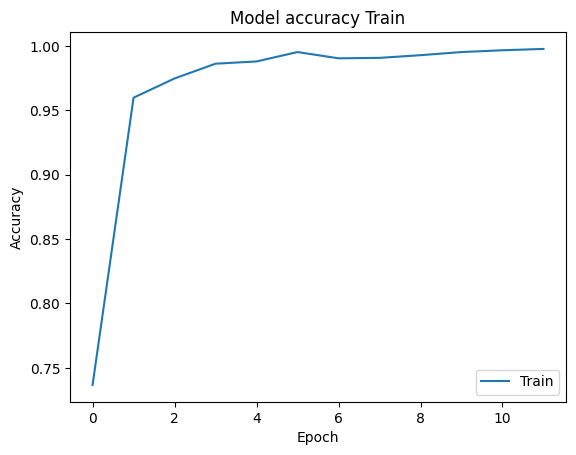

In [19]:
plt.plot(history.history['loss'])
plt.title('Model loss Train')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model accuracy Train')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

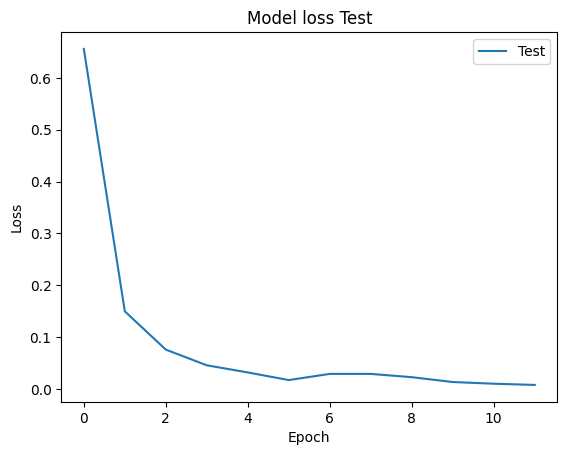

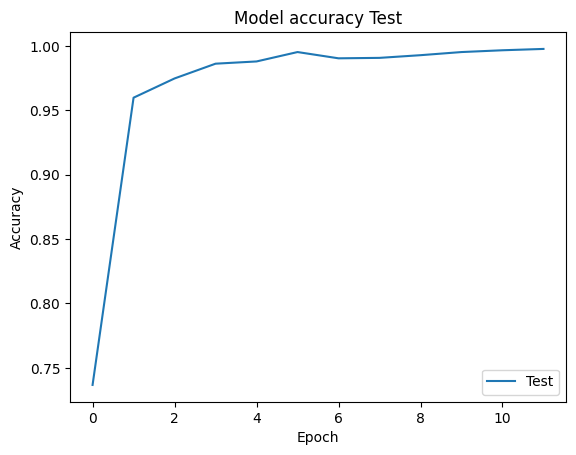

In [20]:
plt.plot(history.history['loss'])
plt.title('Model loss Test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model accuracy Test')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='lower right')
plt.show()